# Imports
 paths based on my downloaded items in my Google Drive

In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/mimic-iv-ed-2.2/ed')

In [3]:
import numpy as np
import pandas as pd

In [39]:
import importlib
import mlp
import attack
import preprocess
importlib.reload(mlp)
importlib.reload(preprocess)
importlib.reload(attack)
from mlp import *
from preprocess import *
from attack import *

# Data
MIMIC-EV-Data tables merged and preprocessed for MLP training (everything done in preprocess.py)

In [5]:
# Preprocess MIMIC-IV-ED Data so that it can be used for model training
df = preprocess_data()

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,seq_num,icd_version,etc_rn,totaltime,chiefcomplaint_abdpain,chiefcomplaint_abnormallabs,chiefcomplaint_alteredmentalstatus,chiefcomplaint_backpain,chiefcomplaint_brbpr,chiefcomplaint_chestpain,"chiefcomplaint_chestpain,dyspnea",chiefcomplaint_dizziness,chiefcomplaint_dyspnea,chiefcomplaint_fever,chiefcomplaint_headache,chiefcomplaint_lowerbackpain,chiefcomplaint_n/v,chiefcomplaint_n/v/d,chiefcomplaint_s/pfall,chiefcomplaint_si,chiefcomplaint_sob,chiefcomplaint_syncope,chiefcomplaint_weakness,chiefcomplaint_woundeval,icd_code_25000,icd_code_2720,icd_code_4019,icd_code_4280,icd_code_486,icd_code_5990,icd_code_7242,icd_code_78060,icd_code_78650,icd_code_78909,icd_code_E119,icd_code_E8889,icd_code_I10,icd_code_M545,icd_code_R0600,icd_code_R079,icd_code_R109,icd_code_R531,icd_code_V5867,icd_code_Z794,etccode_156.0,etccode_250.0,etccode_290.0,etccode_301.0,etccode_414.0,etccode_445.0,etccode_523.0,etccode_575.0,etccode_577.0,etccode_670.0,etccode_701.0,etccode_2683.0,etccode_3510.0,etccode_3948.0,etccode_4609.0,etccode_5843.0,etccode_5904.0,etccode_5970.0,etccode_6094.0,etccode_6615.0,gsn_2173.0,gsn_2532.0,gsn_3009.0,gsn_3757.0,gsn_4376.0,gsn_4380.0,gsn_4490.0,gsn_4560.0,gsn_6373.0,gsn_8208.0,gsn_13318.0,gsn_16927.0,gsn_16995.0,gsn_18368.0,gsn_18698.0,gsn_22159.0,gsn_27462.0,gsn_28090.0,gsn_33530.0,gsn_47780.0,ndc_10003011501.0,ndc_10003011602.0,ndc_10135011101.0,ndc_10135015001.0,ndc_10135017301.0,ndc_10135024036.0,ndc_10135052603.0,ndc_10544013130.0,ndc_10544034130.0,ndc_10544045530.0,ndc_10585086504.0,ndc_11845014770.0,ndc_11845015001.0,ndc_12280027016.0,ndc_13668009705.0,ndc_16590005828.0,ndc_16590031330.0,ndc_21695042308.0,ndc_45802064287.0,ndc_49999099410.0
251,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,2.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
256,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,3.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
292,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,1.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
293,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,2.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
492,10000980,35392246,0,1,4,0,0.021735,0.342568,-0.023713,-0.014414,2.005956,0.469332,0,2.0,1.0,1,1.0,-0.189320,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Target MLP

- train, val, test split
- Target MLP model trained and tested for predicting disposition
- negative cross entropy loss, confidence score, L2 norm of gradient calculated from model
- everything done in mlp.py
- CV done and then target model trained separately
- 95% confidence interval for AUC done with 50 bootstrap samples

Epoch 1/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7208 - loss: 0.5593 - val_accuracy: 0.7879 - val_loss: 0.4308
Epoch 2/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7837 - loss: 0.4452 - val_accuracy: 0.7911 - val_loss: 0.4252
Epoch 3/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7898 - loss: 0.4330 - val_accuracy: 0.7973 - val_loss: 0.4132
Epoch 4/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7974 - loss: 0.4192 - val_accuracy: 0.8014 - val_loss: 0.4112
Epoch 5/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8021 - loss: 0.4152 - val_accuracy: 0.8080 - val_loss: 0.4021
Epoch 6/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8051 - loss: 0.4129 - val_accuracy: 0.8103 - val_loss: 0.3959
Epoch 7/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8096 - loss: 0.4021 - val_accuracy: 0.8065 - val_loss: 0.4034
Epoch 8/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8105 - loss: 0.3963 - val_accuracy: 0.

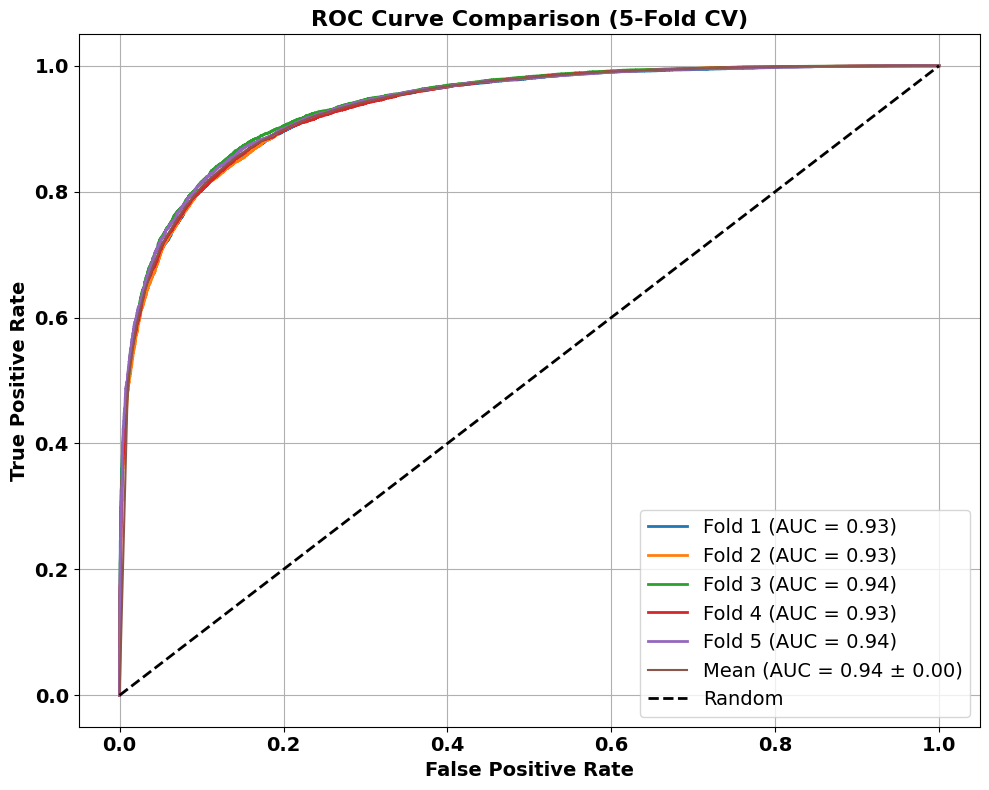

In [34]:
target_model_cv(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)


Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7167 - loss: 0.5738 - val_accuracy: 0.7802 - val_loss: 0.4384
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7817 - loss: 0.4497 - val_accuracy: 0.7807 - val_loss: 0.4338
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7935 - loss: 0.4295 - val_accuracy: 0.7791 - val_loss: 0.4337
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8022 - loss: 0.4174 - val_accuracy: 0.7771 - val_loss: 0.4346
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8074 - loss: 0.4076 - val_accuracy: 0.7785 - val_loss: 0.4403
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8118 - loss: 0.4011 - val_accuracy: 0.7785 - val_loss: 0.4401
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8186 - loss: 0.3903 - val_accuracy: 0.7783 - val_loss: 0.4433
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8214 - loss: 0.3841 - val_accuracy: 0

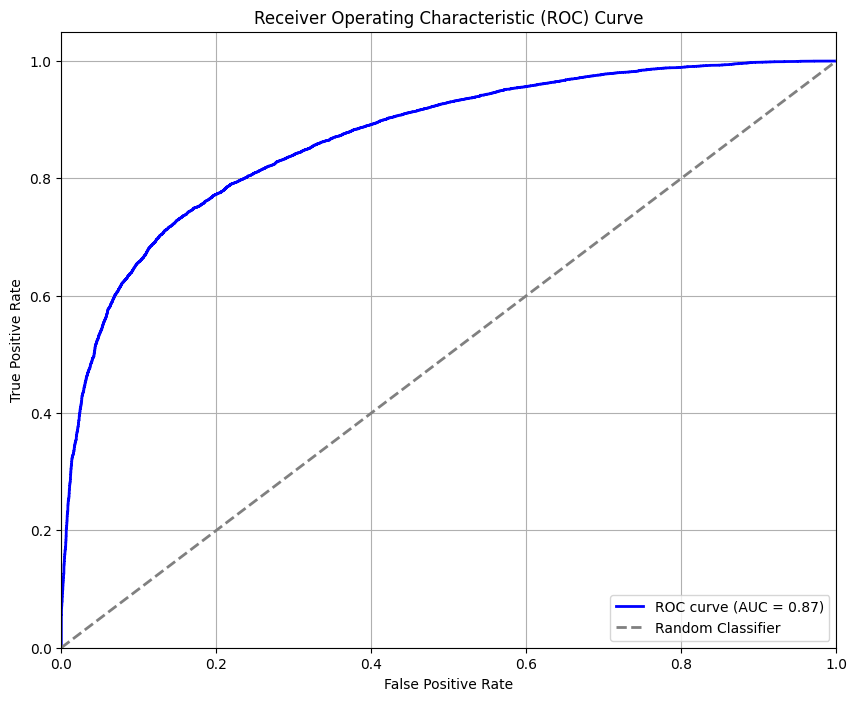

Confidence Score AUC 95% bootstrap CI: [0.486, 0.541]
Grad Norm AUC 95% bootstrap CI: [0.471, 0.521]
Negative Loss AUC 95% bootstrap CI: [0.486, 0.541]


In [26]:
confidence_lower, confidence_upper, grad_lower, grad_upper, loss_lower, loss_upper = seed_loop_for_bootstrap2(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)



print(f"Confidence Score AUC 95% bootstrap CI: [{confidence_lower:.3f}, {confidence_upper:.3f}]")
print(f"Grad Norm AUC 95% bootstrap CI: [{grad_lower:.3f}, {grad_upper:.3f}]")
print(f"Negative Loss AUC 95% bootstrap CI: [{loss_lower:.3f}, {loss_upper:.3f}]")


# MIA via RF



*   trained a rf on loss, confidence score, and gradient norm to predict membership



Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7167 - loss: 0.5738 - val_accuracy: 0.7802 - val_loss: 0.4384
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7817 - loss: 0.4497 - val_accuracy: 0.7804 - val_loss: 0.4341
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7929 - loss: 0.4296 - val_accuracy: 0.7802 - val_loss: 0.4336
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8020 - loss: 0.4174 - val_accuracy: 0.7791 - val_loss: 0.4351
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8065 - loss: 0.4079 - val_accuracy: 0.7769 - val_loss: 0.4403
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8120 - loss: 0.4012 - val_accuracy: 0.7792 - val_loss: 0.4391
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8187 - loss: 0.3905 - val_accuracy: 0.7784 - val_loss: 0.4429
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8218 - loss: 0.3841 - val_accuracy: 0.

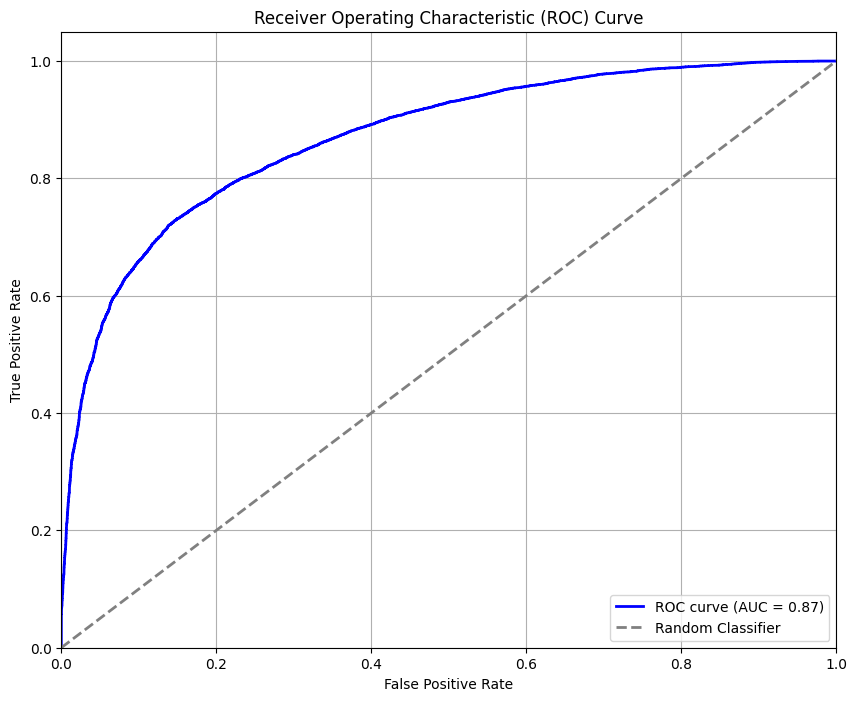

In [43]:
negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member, grads_member_norm, grads_non_member_norm = seed_loop(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)


In [41]:
def mia_dataset(negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member, grads_member_norm, grads_non_member_norm):
  df_member = pd.DataFrame({
      'negative_loss': negative_loss_member,
      'confidence_score': confidence_score_member,
      'grad_norm': grads_member_norm
  })

  df_member['Membership'] = 1

  df_non_member = pd.DataFrame({
      'negative_loss': negative_loss_non_member,
      'confidence_score': confidence_score_non_member,
      'grad_norm': grads_non_member_norm
  })

  df_non_member['Membership'] = 0

  df = pd.concat([df_member, df_non_member], axis = 0)

  return df

In [44]:
mia_df = mia_dataset(negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member,  grads_member_norm, grads_non_member_norm)
mia_df.head()

,negative_loss,confidence_score,grad_norm,Membership
0,-0.570084,0.565478,0.000000e+00,1
1,-0.354948,0.701210,1.163891e-07,1
2,-0.013164,0.986922,0.000000e+00,1
3,-0.317516,0.727955,0.000000e+00,1
4,-0.019706,0.980487,1.419994e-07,1


In [45]:
mia_df[mia_df['Membership'] == 0].describe()

,negative_loss,confidence_score,grad_norm,Membership
count,500.000000,500.000000,5.000000e+02,500.0
mean,-0.428481,0.727702,2.931614e-08,0.0
std,0.569659,0.257848,7.397102e-08,0.0
min,-3.725482,0.024101,0.000000e+00,0.0
25%,-0.605971,0.545546,0.000000e+00,0.0
50%,-0.215333,0.806273,0.000000e+00,0.0
75%,-0.040157,0.960639,0.000000e+00,0.0
max,-0.000130,0.999870,4.593207e-07,0.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

def train_evaluate_random_forest(X, y, test_size=0.2, random_state=42, n_estimators=100, max_depth=None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       100
           1       0.52      0.59      0.55       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



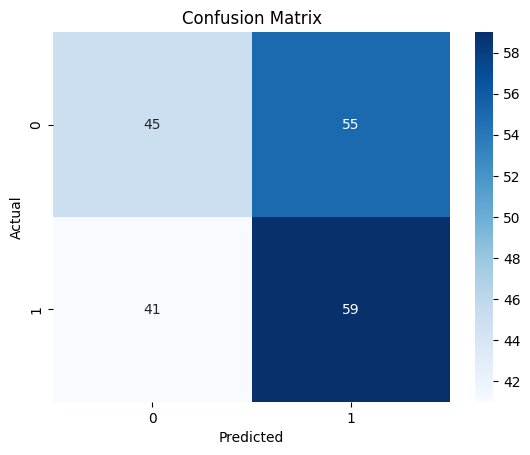

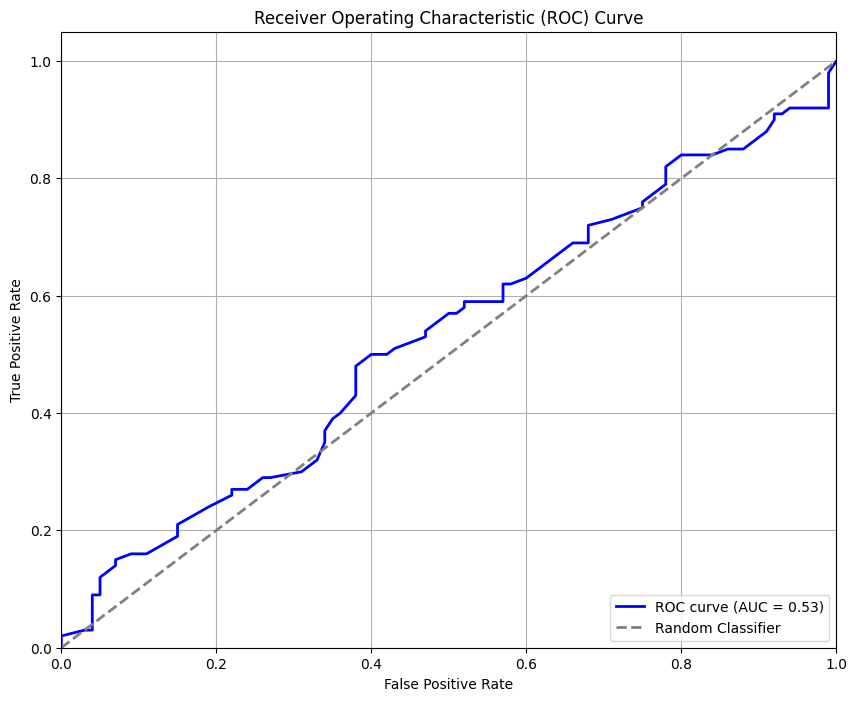

In [50]:
X = mia_df.drop(columns = ['Membership'])
y = mia_df['Membership']
train_evaluate_random_forest(X, y)

# MIA
using negative loss and confidence score to calculate AUC and advantage (everything done in attack.py) (empirical_auc function is not used due to inefficiency)

In [51]:
# AUC using confidence score
auc = empirical_auc_sklearn(confidence_score_member, confidence_score_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5027039999999999


In [52]:
# AUC using gradient norm score
auc = empirical_auc_sklearn(grads_member_norm, grads_non_member_norm)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5193040000000001


In [53]:
# AUC using negative cross entropy loss
auc = empirical_auc_sklearn(negative_loss_member, negative_loss_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5027039999999999


In [54]:
# Advantage for thresholds 0-10 in 0.1 intervals using negative cross entropy loss
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(negative_loss_member, negative_loss_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.0 for Threshold = 0.1
Advantage = 0.0 for Threshold = 0.2
Advantage = 0.0 for Threshold = 0.3
Advantage = 0.0 for Threshold = 0.4
Advantage = 0.0 for Threshold = 0.5
Advantage = 0.0 for Threshold = 0.6
Advantage = 0.0 for Threshold = 0.7
Advantage = 0.0 for Threshold = 0.8
Advantage = 0.0 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0


In [55]:
# Advantage for thresholds 0-10 in 0.1 intervals using confidence score
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(confidence_score_member, confidence_score_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.020000000000000018 for Threshold = 0.1
Advantage = 0.03400000000000003 for Threshold = 0.2
Advantage = 0.017999999999999905 for Threshold = 0.3
Advantage = 0.01200000000000001 for Threshold = 0.4
Advantage = 0.01200000000000001 for Threshold = 0.5
Advantage = 0.018000000000000016 for Threshold = 0.6
Advantage = 0.026000000000000023 for Threshold = 0.7
Advantage = -0.006000000000000005 for Threshold = 0.8
Advantage = -0.03600000000000003 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0


In [57]:
# Advantage for thresholds 0-10 in 0.1 intervals using gradient norm
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(grads_member_norm, grads_non_member_norm, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.0 for Threshold = 0.1
Advantage = 0.0 for Threshold = 0.2
Advantage = 0.0 for Threshold = 0.3
Advantage = 0.0 for Threshold = 0.4
Advantage = 0.0 for Threshold = 0.5
Advantage = 0.0 for Threshold = 0.6
Advantage = 0.0 for Threshold = 0.7
Advantage = 0.0 for Threshold = 0.8
Advantage = 0.0 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0
